![PIC UPV PERTE Chip Chair Logo](https://www.pic-chair.upv.es/wp-content/uploads/2024/05/logo-upv-horizontal.png)
![PIC UPV PERTE Chip Chair Logo](https://www.pic-chair.upv.es/wp-content/uploads/2024/06/logos-perte-chip-1024x119.png)


# Laboratory 1. Waveguides

Welcome to our IPSP Laboratory! Throughout the course, we will be using a Python package called [GDSFactory+](https://gdsfactory.github.io/gdsfactory/index.html). This is a premium version of the the open-source tool GDSFactory, and is a great alternative to other commercial software like Synopsys Optodesigner, Luceda Photonics, or Lumerical/Interconnect. Since it runs on Python, you have two options for executing your laboratory tasks:

1. **Local installation on your own PC** (Recommended): Please note that we will not spend class time on installing the software. However, feel free to reach out if you need help with the installation.

2. **Cloud Workspace**: Alternatively, you can use a cloud-based solution if the Local installation does not work.

## 0. Imports

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

import tidy3d as td

import gplugins as gp
import gplugins.tidy3d as gt
from gplugins import plot
from gplugins.common.config import PATH

nm = 1e-3
wavelength = np.linspace(1500, 1600, 11) * nm
f = td.C_0 / wavelength

2025-10-22 11:45:14.076 | INFO     | gplugins.tidy3d.modes:_data:266 - load data from .cache/Waveguide_fcecc1453513131a.npz.
2025-10-22 11:45:14.792 | INFO     | gplugins.tidy3d.modes:_data:266 - load data from .cache/Waveguide_dab7ddf1d9468bde.npz.
2025-10-22 11:45:14.990 | INFO     | gplugins.tidy3d.modes:_data:266 - load data from .cache/Waveguide_23831a0a730a6abc.npz.
2025-10-22 11:45:14.993 | INFO     | gplugins.tidy3d.modes:_data:266 - load data from .cache/Waveguide_2261ebe252ef4582.npz.
2025-10-22 11:45:14.998 | INFO     | gplugins.tidy3d.modes:_data:266 - load data from .cache/Waveguide_106bf7ef106fcce8.npz.
2025-10-22 11:45:15.001 | INFO     | gplugins.tidy3d.modes:_data:266 - load data from .cache/Waveguide_1a56e4d88464eef6.npz.
2025-10-22 11:45:15.004 | INFO     | gplugins.tidy3d.modes:_data:266 - load data from .cache/Waveguide_7d937a693275b50a.npz.
2025-10-22 11:45:15.008 | INFO     | gplugins.tidy3d.modes:_data:266 - load data from .cache/Waveguide_94ad28b025d25df2.npz.


## LO.1. Effective index of a waveguide

### 1.1. Materials

We need the refractive index of each material in the cross-section. There are different options to get this information, such as [RefractiveIndex.info](https://refractiveindex.info/) and the [Material Library from Tidy3D](https://docs.flexcompute.com/projects/tidy3d/en/v2.6.0/api/material_library.html#). Here we will load and check the characteristics from the most common materials used in fabrication of photonic circuits.

#### 1.1.1. Crystalline Silicon 

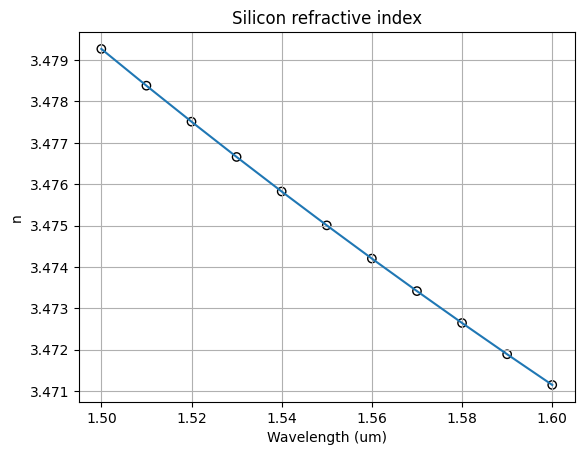

In [2]:
## Material model loaded
si_complex = td.material_library["cSi"]["Li1993_293K"].eps_model(f)
## Check the Tidy3D Docs for more information on the "Variant"

## Index at a particular wavelength
si_index , si_k = td.Medium.eps_complex_to_nk(si_complex)
plt.scatter(wavelength, si_index,edgecolors='k',facecolors='none')
plt.plot(wavelength,si_index)
plt.title("Silicon refractive index")
plt.xlabel("Wavelength (um)")
plt.ylabel("n")
plt.grid()

#### 1.1.2. Silicon Nitride

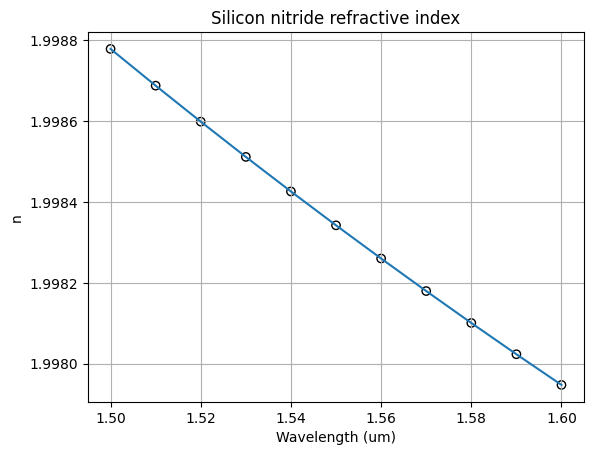

In [3]:
nitride_complex = td.material_library["Si3N4"]["Luke2015PMLStable"].eps_model(f)
nitride_index, nitride_k = td.Medium.eps_complex_to_nk(nitride_complex)
plt.scatter(wavelength,nitride_index,edgecolors='k',facecolors='none')
plt.plot(wavelength, nitride_index)
plt.title("Silicon nitride refractive index")
plt.xlabel("Wavelength (um)")
plt.ylabel("n")
plt.grid()


#### 1.1.3. Silicon Dioxide

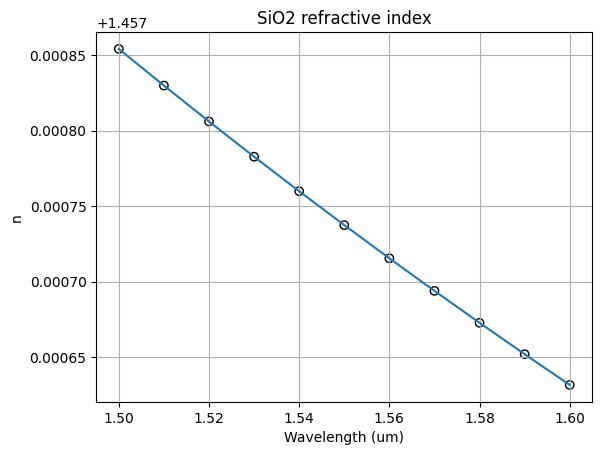

In [4]:
box_complex = td.material_library["SiO2"]["Horiba"].eps_model(f)
box_index, box_k = td.Medium.eps_complex_to_nk(box_complex)
plt.scatter(wavelength,box_index,edgecolors='k',facecolors='None')
plt.plot(wavelength, box_index)
plt.title("SiO2 refractive index")
plt.xlabel("Wavelength (um)")
plt.ylabel("n")
plt.grid()

### 1.2. Cross - Section Definition

In GDSFactory - Tidy3d modesolver we just have to use the [gt.modes.Waveguide()](https://gdsfactory.github.io/gplugins/_autosummary/gplugins.tidy3d.modes.Waveguide.html) function. It implements the deep (rib) and shallow (ridge) waveguides. 

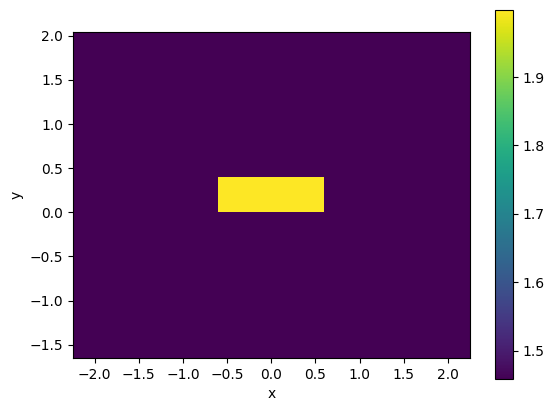

In [5]:
deep_waveguide = gt.modes.Waveguide(
    wavelength=wavelength,
    core_width=1.2,
    slab_thickness=0.0,
    core_material='sin',
    clad_material='sio2',
    core_thickness=400 * nm,
    num_modes=4,
    cache_path='.cache/',
    precision='double',
    max_grid_scaling=1.2,
    grid_resolution=20, 
)
deep_waveguide.plot_index()

### 1.3. Simulations

#### 1.3.1. Numerical results

We can find the effective index (n_eff), TE and TM fraction for each particular cross-section.

In [6]:
deep_waveguide.n_eff

array([[1.68080119+6.82555885e-05j, 1.6038147 +1.36301757e-04j,
        1.49107381+1.46802743e-04j, 1.45803722+1.89221548e-04j],
       [1.67841547+6.87366101e-05j, 1.60140327+1.36695569e-04j,
        1.4882751 +1.48408810e-04j, 1.45594742+1.89907121e-04j],
       [1.6760418 +6.92153668e-05j, 1.59902036+1.37072265e-04j,
        1.48556202+1.50009891e-04j, 1.45394008+1.90519877e-04j],
       [1.67368027+6.96918092e-05j, 1.59666592+1.37432033e-04j,
        1.48293616+1.51602867e-04j, 1.45201258+1.91057914e-04j],
       [1.67133096+7.01658872e-05j, 1.59433987+1.37775069e-04j,
        1.48039891+1.53183783e-04j, 1.45016202+1.91519371e-04j],
       [1.66899396+7.06375502e-05j, 1.59204216+1.38101575e-04j,
        1.47795142+1.54747788e-04j, 1.44838529+1.91903846e-04j],
       [1.66666934+7.11067468e-05j, 1.58977271+1.38411759e-04j,
        1.47559457+1.56289124e-04j, 1.44667909+1.92211429e-04j],
       [1.66435718+7.15734251e-05j, 1.58753144+1.38705832e-04j,
        1.47332886+1.57801173e-04

In [7]:
deep_waveguide.fraction_te

array([0.99504067, 0.01213854, 0.96467894, 0.0193213 ])

In [8]:
deep_waveguide.fraction_tm

array([0.00495933, 0.98786146, 0.03532106, 0.9806787 ])

#### 1.3.4. Plots

Text(0.5, 1.0, 'Titulo')

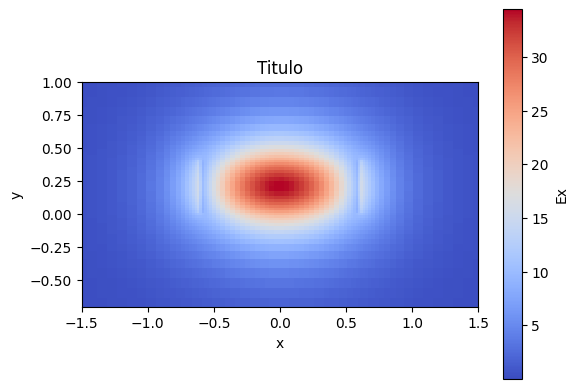

In [9]:
deep_waveguide.plot_field(mode_index=0 , # Mode to be plotted
                          field_name='Ex', # Field to be plotted
                          value='real', # Real - abs - imag
                            cmap='coolwarm', # Suggestions: Change the plot color
                          xlim=(-1.5, 1.5), # Set the x and y limits
                          ylim=(-0.7, 1)
) # 
plt.title('Titulo') # You might need this later :) 

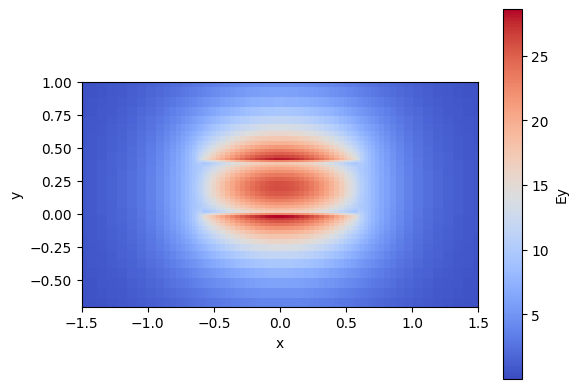

In [10]:
deep_waveguide.plot_field(mode_index=1 , # Mode to be plotted
                          field_name='Ey', # Field to be plotted
                          value='real', # Real - abs - imag
                          cmap='coolwarm', # Suggestions: Change the plot color
                          xlim=(-1.5, 1.5), # Set the x and y limits
                          ylim=(-0.7, 1)) # 

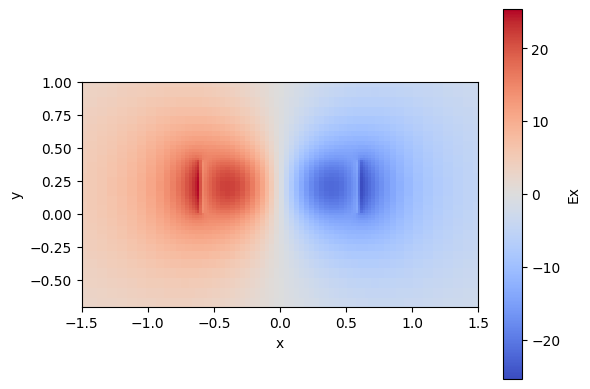

In [11]:
deep_waveguide.plot_field(mode_index=2 , # Mode to be plotted
                          field_name='Ex', # Field to be plotted
                          value='real', # Real - abs - imag
                          cmap='coolwarm', # Suggestions: Change the plot color
                          xlim=(-1.5, 1.5), # Set the x and y limits
                          ylim=(-0.7, 1)) # 

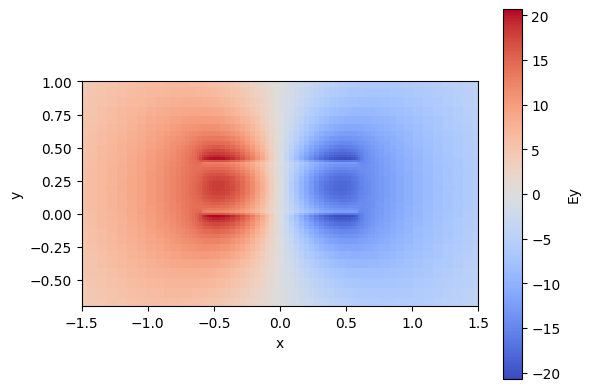

In [12]:
deep_waveguide.plot_field(mode_index=3, # Mode to be plotted
                          field_name='Ey', # Field to be plotted
                          value='real', # Real - abs - imag
                          cmap='coolwarm', # Suggestions: Change the plot color
                          xlim=(-1.5, 1.5), # Set the x and y limits
                          ylim=(-0.7, 1)) # 

**Important** 
These results are derived from a numerical method used to solve the EM problem, so they must always be interpreted carefully to assess their accuracy. You must check, for instance, if the value of each index neff is higher than the refractive index of the cladding. 

## LO.2. Wavelength behavior

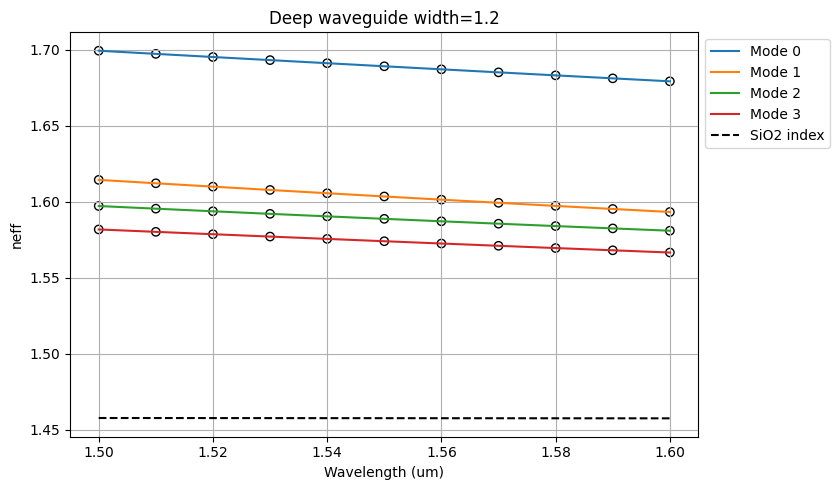

In [13]:
deep_waveguide = gt.modes.Waveguide(
    wavelength=wavelength,
    core_width=1.2,
    slab_thickness=0.2,
    core_material='sin',
    clad_material='sio2',
    core_thickness=400 * nm,
    num_modes=4,
    cache_path='.cache/',
    precision='double',
    max_grid_scaling=1.2,
    grid_resolution=20, 
)


res_neff = deep_waveguide.n_eff # In this case, the result is not just a number, is a wavelength-dependent vector
res_te = deep_waveguide.fraction_te # Wavelength-dependent vector
res_tm =deep_waveguide.fraction_tm # Wavelength-dependent vector

plt.figure(figsize=(10, 5))
for k in range(res_neff.shape[1]):
    # It's necessary to 'access' each element on the array
    plt.scatter(wavelength, res_neff[:,k].real,edgecolors='k',facecolors='none',label = '__nolegend__')
    plt.plot(wavelength, res_neff[:,k].real,label=f'Mode {k}')
plt.title(f"Deep waveguide width={1.2}")
plt.xlabel("Wavelength (um)")
plt.ylabel("neff")
plt.grid()
plt.plot(wavelength, box_index,'k--', label='SiO2 index')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout(rect=[0, 0, 0.85, 1])

## LO.3. Width dependence

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

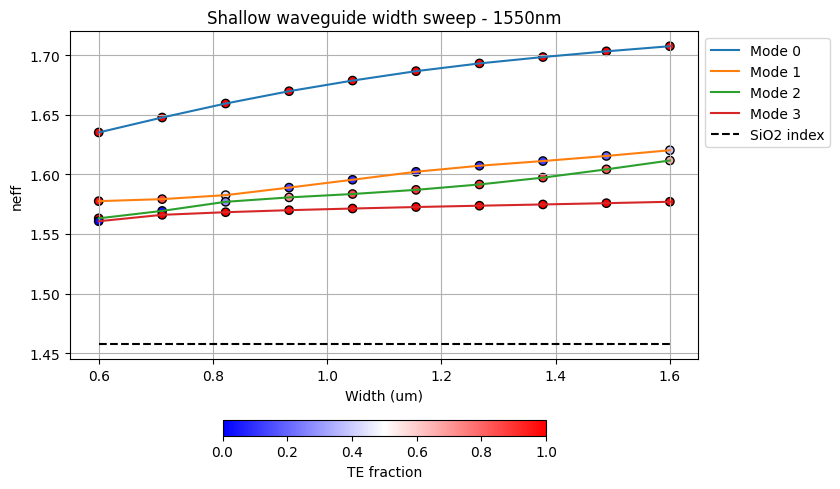

In [14]:
wavelength = 1.55 # Student code here

deep_waveguide = gt.modes.Waveguide(
    wavelength=wavelength,
    core_width=1.2,
    slab_thickness=0.2,
    core_material='sin',
    clad_material='sio2',
    core_thickness=400 * nm,
    num_modes=4,
    cache_path='.cache/',
    precision='double',
    max_grid_scaling=1.2,
    grid_resolution=20, 
)

w = np.linspace(0.6,1.6,10) # Student code here

sweep_neff = gt.modes.sweep_n_eff(deep_waveguide, 
                             core_width=w)

sweep_tefraction = gt.modes.sweep_fraction_te(deep_waveguide,
                                              core_width=w)

plt.figure(figsize=(10, 5))
for k in range(sweep_neff.shape[1]):
    plt.scatter(w, sweep_neff[:,k].real,edgecolors='k',c=sweep_tefraction.sel(mode_index=k),vmin=0, vmax=1,label = '__nolegend__',cmap='bwr')
    plt.plot(w, sweep_neff[:,k].real,label=f'Mode {k}')

plt.title("Shallow waveguide width sweep - 1550nm")
plt.xlabel("Width (um)")
plt.ylabel("neff")
plt.grid()
plt.hlines(np.mean(box_index), xmin=np.min(w), xmax=np.max(w), colors='k', linestyles='dashed',label='SiO2 index')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout(rect=[0, 0, 0.85, 1])
plt.colorbar(orientation='horizontal',fraction=0.04).set_label("TE fraction")

## LO.4. Waveguide compact model

Transfer function for propagation in a waveguide:

$$
H(\lambda)
= e^{-j\,\beta(\lambda)\,z}
= e^{-j\,\mathrm{Re}\{\beta(\lambda)\}\,z}\,
  e^{\mathrm{Im}\{\beta(\lambda)\}\,z}.
$$

Where 

$$
\beta(\lambda)
= \frac{2\pi}{\lambda}\,\mathrm{Re}\{n_\mathrm{eff}(\lambda)\}.
$$

Let's model the waveguide's effective index wavelength variation using a second order polynomial:

$$
n_\mathrm{eff}(\lambda)
= n_{1} + n_{2}\,(\lambda-\lambda_{0}) + n_{3}\,(\lambda-\lambda_{0})^{2}
$$

Where 

1. 
$$
n_\mathrm{eff}(\lambda_0) = n_1
$$
2. 
$$
n_g(\lambda_0) = n_1 - n_2\,\lambda_0
$$
3. 
$$
D = -\frac{2\,\lambda_0\,n_3}{c}\;\;[\mathrm{s}^2/\mathrm{m}]
$$

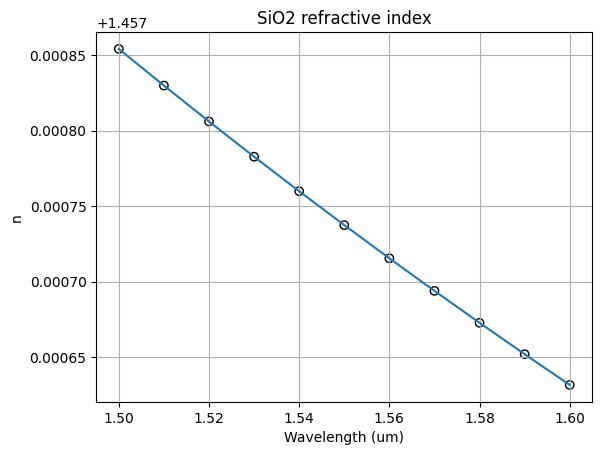

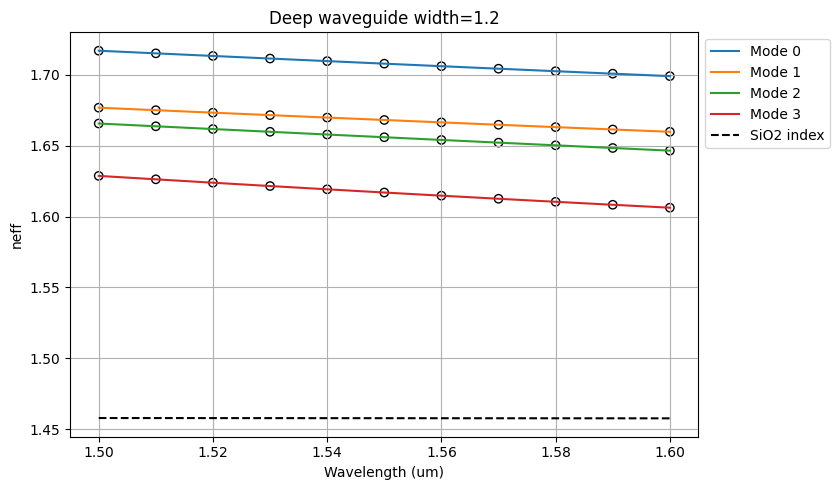

In [19]:
wavelength= np.linspace(1.5,1.6,11)

box_complex = td.material_library["SiO2"]["Horiba"].eps_model(f)
box_index, box_k = td.Medium.eps_complex_to_nk(box_complex)
plt.scatter(wavelength,box_index,edgecolors='k',facecolors='None')
plt.plot(wavelength, box_index)
plt.title("SiO2 refractive index")
plt.xlabel("Wavelength (um)")
plt.ylabel("n")
plt.grid()

deep_waveguide = gt.modes.Waveguide(
    wavelength=wavelength,
    core_width=1.2,
    slab_thickness=0.3,
    core_material='sin',
    clad_material='sio2',
    core_thickness=400 * nm,
    num_modes=4,
    cache_path='.cache/',
    precision='double',
    max_grid_scaling=1.2,
    grid_resolution=20, 
)


res_neff = deep_waveguide.n_eff # In this case, the result is not just a number, is a wavelength-dependent vector
res_te = deep_waveguide.fraction_te # Wavelength-dependent vector
res_tm =deep_waveguide.fraction_tm # Wavelength-dependent vector

plt.figure(figsize=(10, 5))
for k in range(res_neff.shape[1]):
    # It's necessary to 'access' each element on the array
    plt.scatter(wavelength, res_neff[:,k].real,edgecolors='k',facecolors='none',label = '__nolegend__')
    plt.plot(wavelength, res_neff[:,k].real,label=f'Mode {k}')
plt.title(f"Deep waveguide width={1.2}")
plt.xlabel("Wavelength (um)")
plt.ylabel("neff")
plt.grid()
plt.plot(wavelength, box_index,'k--', label='SiO2 index')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout(rect=[0, 0, 0.85, 1])

[0.99805451 0.99716873 0.99983108 0.31394508] [1.94548577e-03 2.83127077e-03 1.68917657e-04 6.86054921e-01]
Polynomial coefficients: [ 0.06639913-1.74574060e-05j -0.38524102+8.41691933e-05j
  2.14557102-2.64705740e-05j]
Polynomial coefficients: [ 0.0676688 -2.57844370e-05j -0.37996923+9.86782532e-05j
  2.09459463-1.17205651e-05j]


/home/ruben/Documentos/GitHub/pdk_UPVfab_v2/.venv/lib/python3.12/site-packages/matplotlib/cbook.py:1719: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/home/ruben/Documentos/GitHub/pdk_UPVfab_v2/.venv/lib/python3.12/site-packages/matplotlib/collections.py:200: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


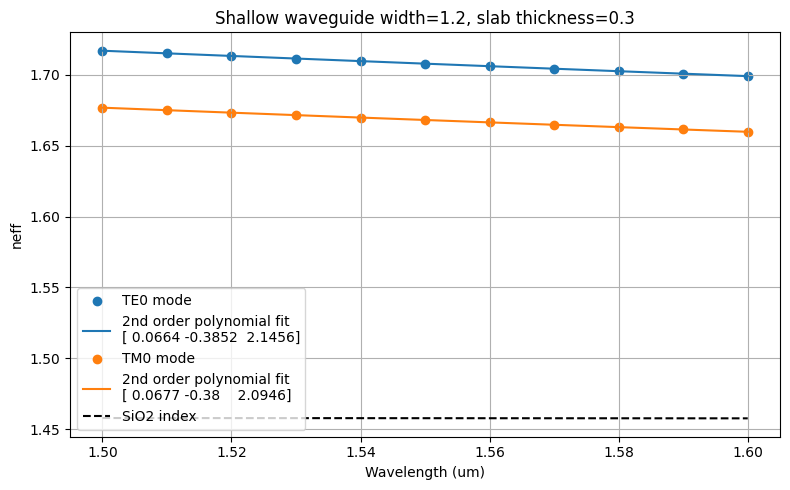

In [20]:
# looking at res_te and res_tm, modes 0 and 2 are TE, while modes 1 and 3 are TM
print(res_te, res_tm)

#recover the refractive index for each mode
neff_mode0=res_neff[:,0] 
neff_mode1=res_neff[:,1]
neff_mode2=res_neff[:,2]
neff_mode3=res_neff[:,3]

#num modes = 2 because we want to include the TE0 and TM0 modes only
num_modes=2 
#now we want to find the fit
#n=n1+n2*(lamb-lamb_0)+n3*(lamb-lamb_0)**2
plt.figure(figsize=(8,5))
titles=["TE0 mode", "TM0 mode"]
for i in range(num_modes):
    x = wavelength
    y = res_neff[:,i]
    # Fit a 2nd degree polynomial
    coefficients = np.polyfit(x, y, 2)
    print("Polynomial coefficients:", coefficients)

    #Create polynomial function:
    poly = np.poly1d(np.real(coefficients))
    #Evaluate the polynomial at different wavelengths
    y_fit = poly(x)

    #Plot data and fit
    plt.scatter(x, y, label=titles[i])
    plt.plot(x, y_fit, label=f"2nd order polynomial fit\n{np.round(np.real(coefficients),4)}")
    plt.legend()
    plt.xlabel('Wavelength (um)')
    plt.ylabel('neff')
plt.title(f"Shallow waveguide width={1.2}, slab thickness={0.3}")
plt.grid(True)
plt.plot(wavelength, box_index,'k--', label='SiO2 index')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()

In [ ]:
neff_mode0
wavelength

array([1.2 , 1.24, 1.28, 1.32, 1.36, 1.4 , 1.44, 1.48, 1.52, 1.56, 1.6 ])

## LO.5. Bend waveguide radius vs. loss – deep

The bend loss has three primary contributions:

1. Mode-mismatch loss
2. Radiation loss
3. Propagation loss

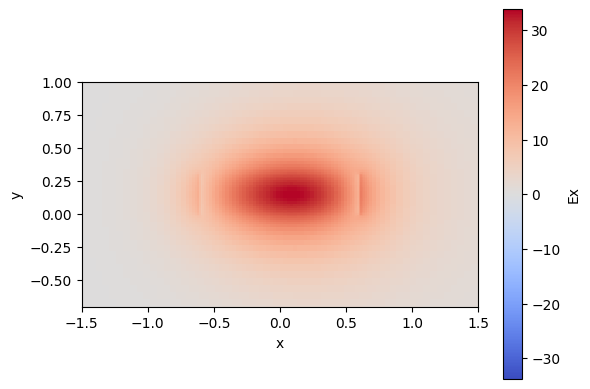

In [ ]:
bend_1550 = gt.modes.Waveguide(
    wavelength=1550 * nm,
    core_width=1.2,
    slab_thickness=0.0,
    core_material='sin',
    clad_material='sio2',
    core_thickness=300 * nm,
    num_modes=1,
    cache_path='.cache/',
    precision='double',
    max_grid_scaling=1.2,
    grid_resolution=30, 
    bend_radius=20, # Bend radius
)

bend_1550.plot_field(field_name="Ex", 
                     mode_index=0, # Field to be plotted
                     value='real', # Real - abs - imag
                     cmap='coolwarm',
                     xlim=(-1.5, 1.5), # Set the x and y limits
                     ylim=(-0.7, 1)) 

### Mode-mismatch loss

Bend waveguide mode differs slightly from the straight waveguide mode, wich yield into mode-convertion losses. We can calculate this factor with as the overlap of the latter two modes. 

This is already implemented on GDSfactory library: 

  0%|          | 0/10 [00:00<?, ?it/s]

Text(0, 0.5, 'Mismatch (dB)')

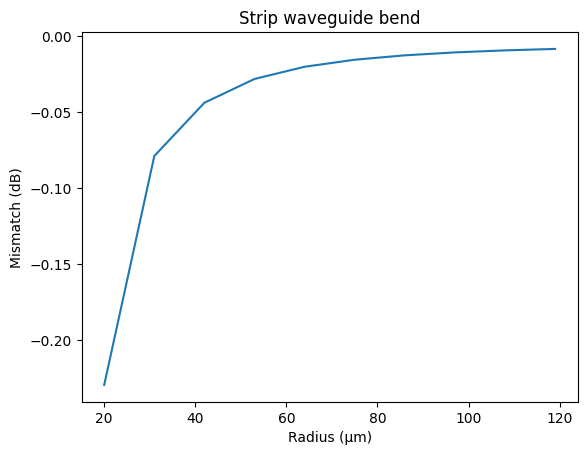

In [ ]:
radii = np.arange(20.0, 120,11)

mismatch = gt.modes.sweep_bend_mismatch(bend_1550, radii)

plt.plot(radii, 10 * np.log10(mismatch))
plt.title("Strip waveguide bend")
plt.xlabel("Radius (μm)")
plt.ylabel("Mismatch (dB)")

### Propagation loss

Consider the equivalent linear length of the quarter-circle bend. Light will attenuate following a trend quantified with the experimentally measured parameter $$\alpha [\mathrm{dB}/\mathrm{cm}]$$. It depends on the fabrication process mainly. We will add this loss (in dBs) to the mode-mismatch loss to calculate the total loss per bend. 

*We are not considering the radiation losses, mainly because is not easy to implement a quick simulation for this parameter. Under certain conditions, the main loss sources are the ones considered in this example


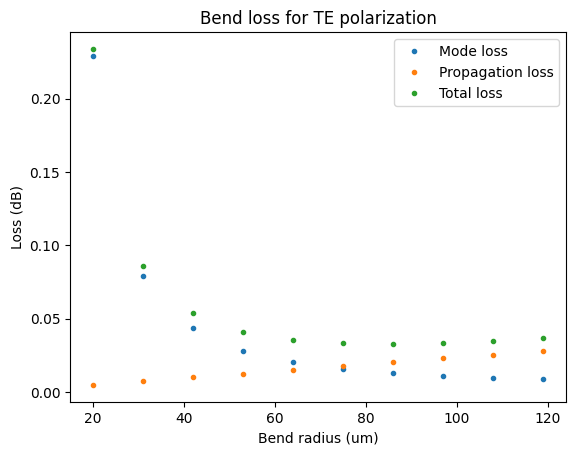

In [ ]:
dB_cm = 1.5  # dB/cm Technology loss - 
length = 0.5 * np.pi * radii * 1e-6
propagation_loss = dB_cm * length * 1e2
propagation_loss

plt.title("Bend loss for TE polarization")
plt.plot(radii, -10 * np.log10(mismatch), ".", label="Mode loss")
plt.plot(radii, propagation_loss, ".", label="Propagation loss")
plt.plot(radii, propagation_loss-10 * np.log10(mismatch), ".", label="Total loss")
plt.xlabel("Bend radius (um)")
plt.ylabel("Loss (dB)")
plt.legend()